In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
def reg_results(y_actual, y_pred, reg_type):
    ev = explained_variance_score(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)

    print(f'\nEvaluation Metrics for {reg_type} Linear Regression')
    print('Explained Variance:', round(ev, 4))
    print('MAE:', round(mae, 4))
    print('MSE:', round(mse, 4))
    print('RMSE:', round(np.sqrt(mse), 4))
    print('R^2:', round(r2, 4))

<h3>Generating Synthetic Dataset</h3>

In [3]:
# Generating Synthetic Data
noise = 1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise * np.random.randn(1000, 1) # Linear rel with noise
y_ideal = 4 + 3 * X
# Add outliers
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify X > certain threshold
threshold = 1.5
outlier_ind = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations
num_outliers = 5
selected_ind = np.random.choice(outlier_ind, num_outliers, replace=False)

# Modify target values at these indices to create outliers
y_outlier[selected_ind] += np.random.uniform(50, 100, num_outliers)

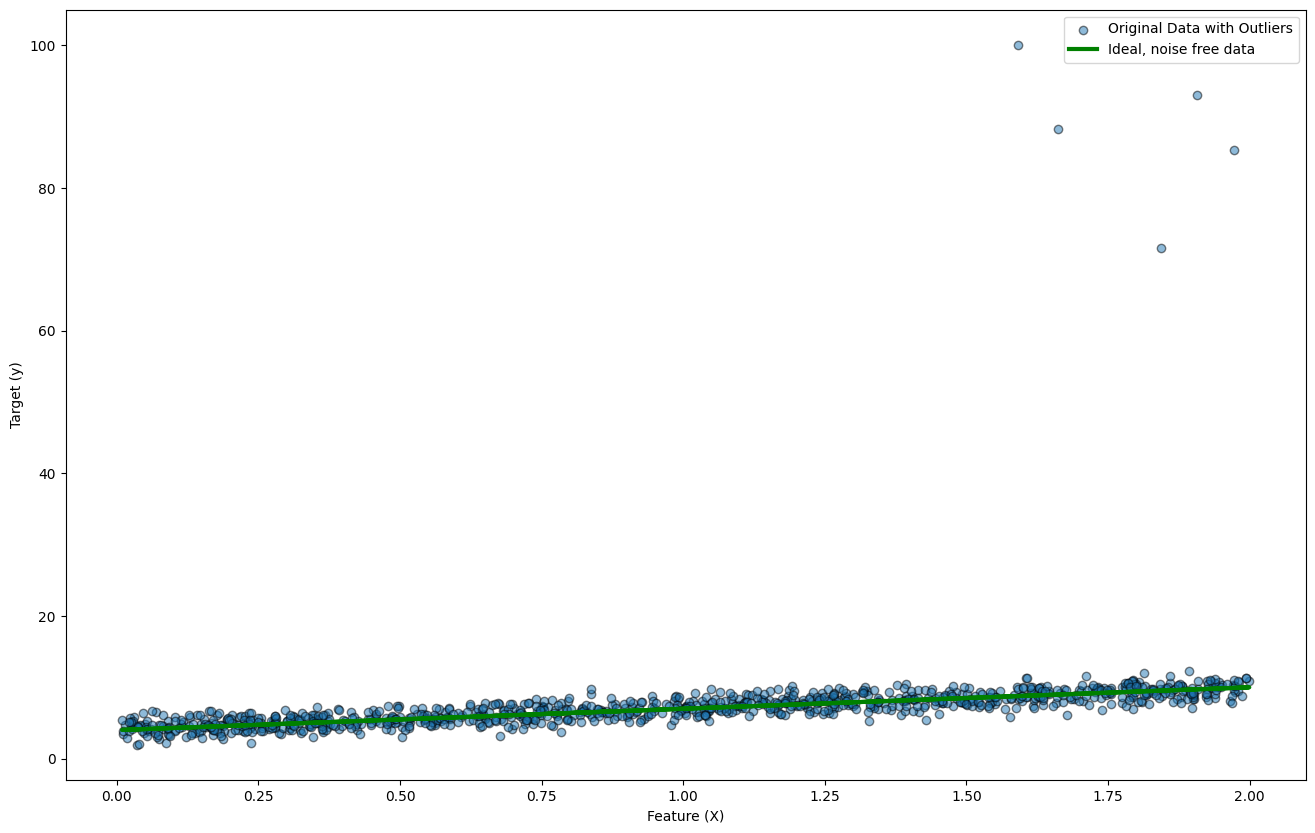

In [6]:
plt.figure(figsize=(16, 10))
plt.scatter(X, y_outlier, alpha=0.5, ec='k', label='Original Data with Outliers')
plt.plot(X, y_ideal, linewidth=3, c='g', label='Ideal, noise free data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

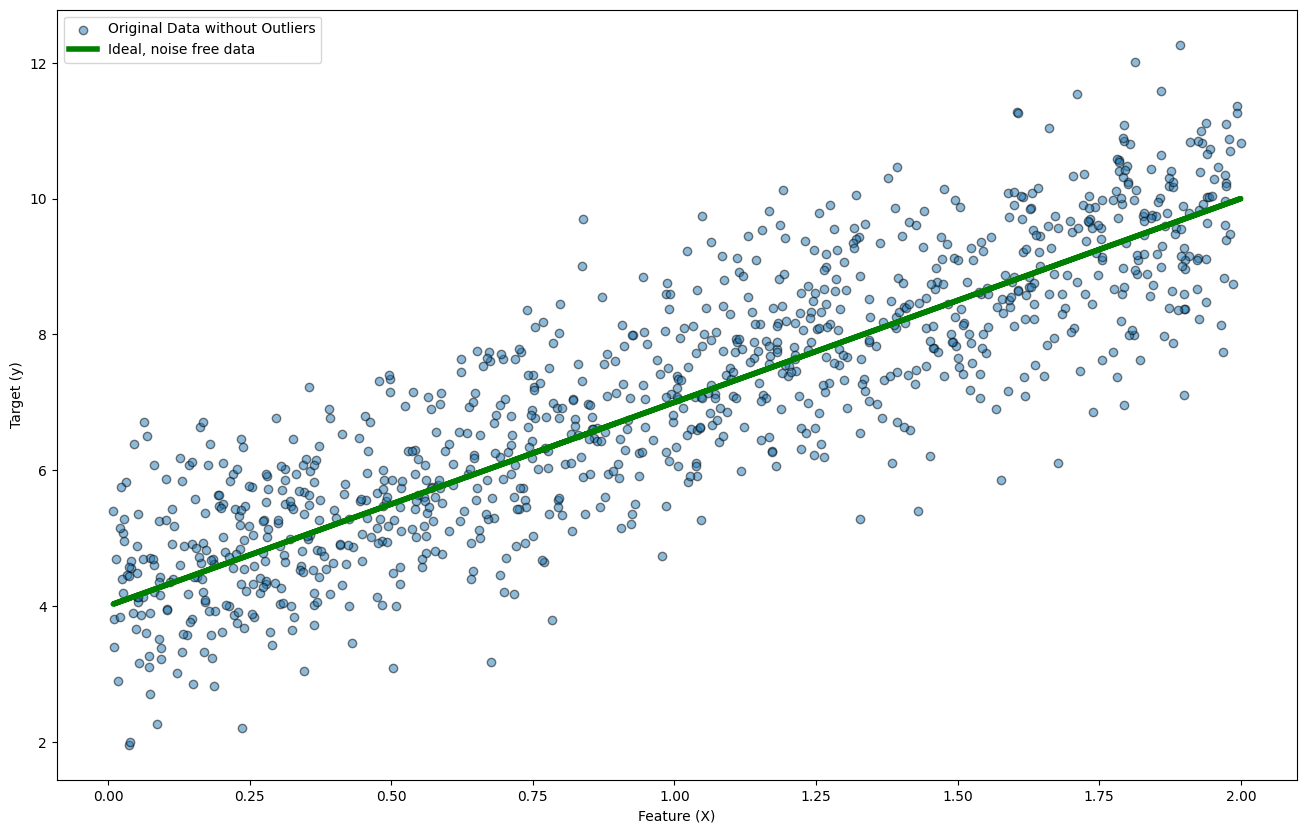

In [7]:
plt.figure(figsize=(16, 10))
plt.scatter(X, y, alpha=0.5, ec='k', label='Original Data without Outliers')
plt.plot(X, y_ideal, linewidth=4, c='g', label='Ideal, noise free data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


Evaluation Metrics for Ordinary Linear Regression
Explained Variance: 0.6748
MAE: 0.9468
MSE: 1.4164
RMSE: 1.1901
R^2: 0.6357

Evaluation Metrics for Ridge Linear Regression
Explained Variance: 0.6766
MAE: 0.9443
MSE: 1.4094
RMSE: 1.1872
R^2: 0.6375

Evaluation Metrics for Lasso Linear Regression
Explained Variance: 0.7394
MAE: 0.8597
MSE: 1.1651
RMSE: 1.0794
R^2: 0.7003


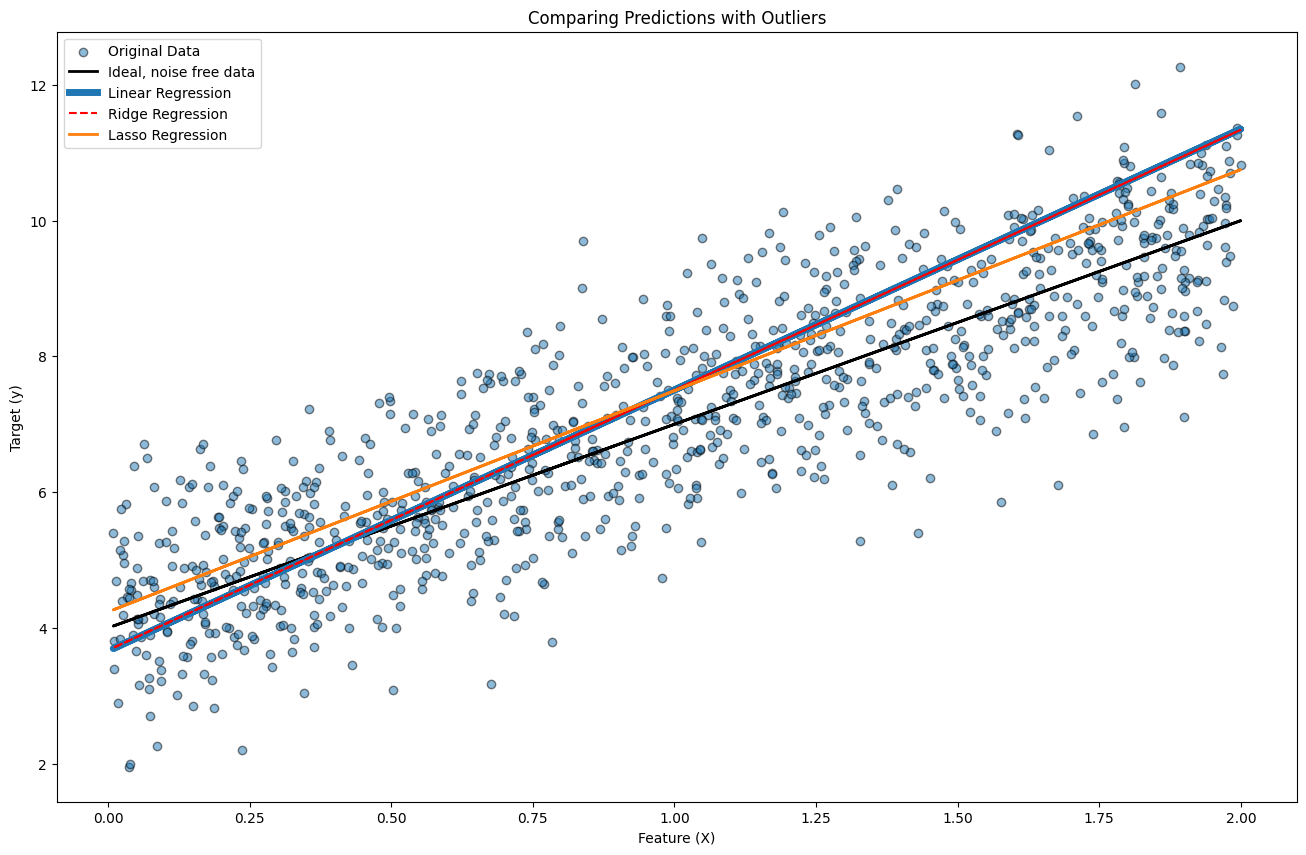

In [14]:
lr = LinearRegression()
lr.fit(X, y_outlier)
y_outlier_pred_lr = lr.predict(X)
reg_results(y, y_outlier_pred_lr, 'Ordinary')

ridge = Ridge(alpha=1)
ridge.fit(X, y_outlier)
y_outlier_pred_ridge = ridge.predict(X)
reg_results(y, y_outlier_pred_ridge, 'Ridge')

lasso = Lasso(alpha=0.2)
lasso.fit(X, y_outlier)
y_outlier_pred_lasso = lasso.predict(X)
reg_results(y, y_outlier_pred_lasso, 'Lasso')

plt.figure(figsize=(16, 10))
plt.scatter(X, y, alpha=0.5, ec='k', label='Original Data')
plt.plot(X, y_ideal, linewidth=2, c='k', label='Ideal, noise free data')

plt.plot(X, y_outlier_pred_lr, linewidth=5, label='Linear Regression')
plt.plot(X, y_outlier_pred_ridge, c='red', linestyle='--', label='Ridge Regression')
plt.plot(X, y_outlier_pred_lasso, linewidth=2, label='Lasso Regression')

plt.title('Comparing Predictions with Outliers')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


Evaluation Metrics for Ordinary Linear Regression
Explained Variance: 0.7492
MAE: 0.7873
MSE: 0.975
RMSE: 0.9874
R^2: 0.7492

Evaluation Metrics for Ridge Linear Regression
Explained Variance: 0.7492
MAE: 0.7874
MSE: 0.975
RMSE: 0.9874
R^2: 0.7492

Evaluation Metrics for Lasso Linear Regression
Explained Variance: 0.7191
MAE: 0.8408
MSE: 1.0923
RMSE: 1.0451
R^2: 0.7191


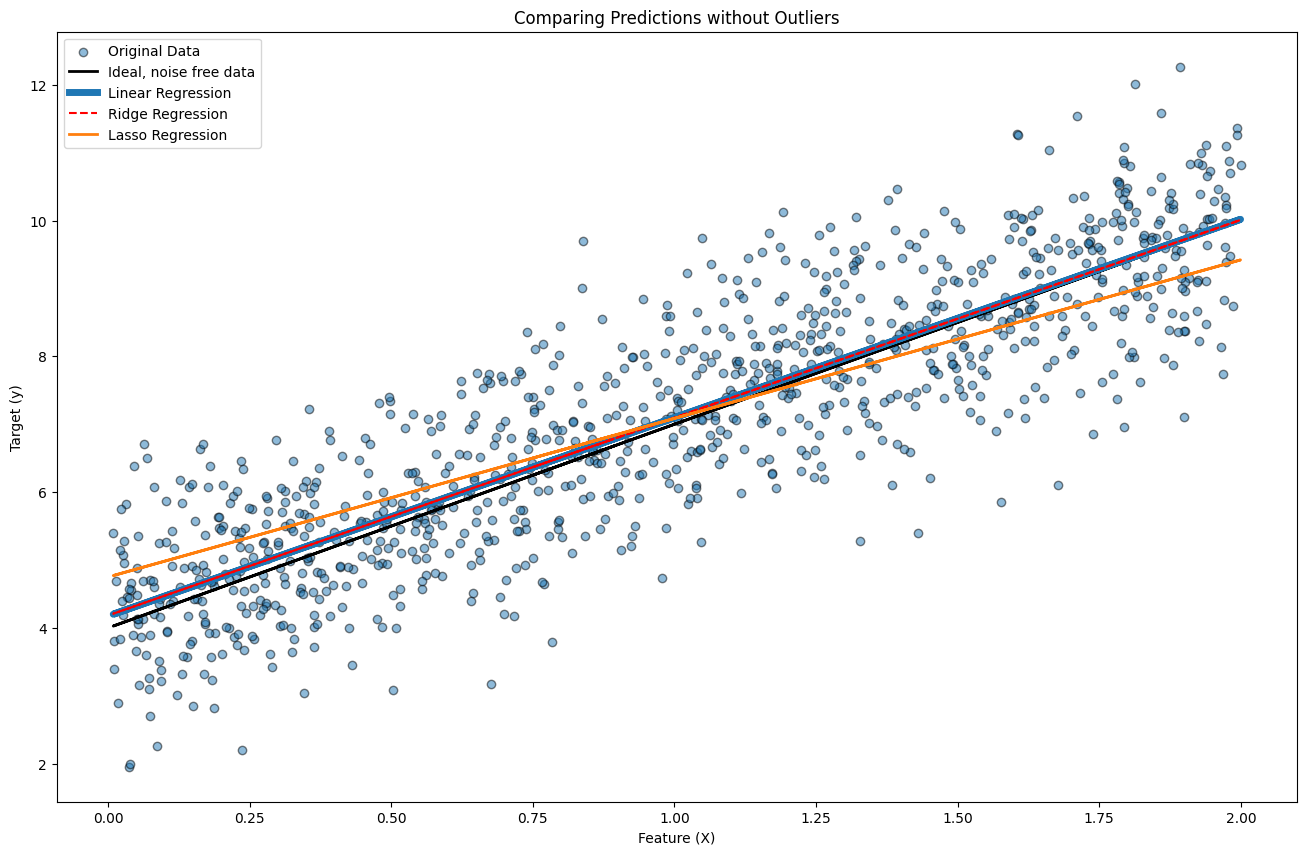

In [13]:
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)
reg_results(y, y_pred_lr, 'Ordinary')

ridge = Ridge(alpha=1)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
reg_results(y, y_pred_ridge, 'Ridge')

lasso = Lasso(alpha=0.2)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
reg_results(y, y_pred_lasso, 'Lasso')

plt.figure(figsize=(16, 10))
plt.scatter(X, y, alpha=0.5, ec='k', label='Original Data')
plt.plot(X, y_ideal, linewidth=2, c='k', label='Ideal, noise free data')

plt.plot(X, y_pred_lr, linewidth=5, label='Linear Regression')
plt.plot(X, y_pred_ridge, c='red', linestyle='--', label='Ridge Regression')
plt.plot(X, y_pred_lasso, linewidth=2, label='Lasso Regression')

plt.title('Comparing Predictions without Outliers')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

<h3>High-dimensional synthetic dataset generation using make_regression</h3>

In [18]:
X, y, ideal_coef = make_regression(n_samples=100, n_features=100,
                                   n_informative=10, noise=10,
                                   random_state=42, coef=True)

ideal_pred = X @ ideal_coef

X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X, y, ideal_pred, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
reg_results(y_test, y_pred_lr, 'Ordinary')

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
reg_results(y_test, y_pred_ridge, 'Ridge')

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
reg_results(y_test, y_pred_lasso, 'Lasso')


Evaluation Metrics for Ordinary Linear Regression
Explained Variance: 0.4354
MAE: 77.7353
MSE: 9844.2714
RMSE: 99.2183
R^2: 0.4018

Evaluation Metrics for Ridge Linear Regression
Explained Variance: 0.4446
MAE: 76.9622
MSE: 9744.4693
RMSE: 98.7141
R^2: 0.4079

Evaluation Metrics for Lasso Linear Regression
Explained Variance: 0.9815
MAE: 13.8855
MSE: 304.644
RMSE: 17.4541
R^2: 0.9815


- The results for ordinary and redge regression are poor. Explained variances are under 50% and R^2 is very low.
- The results for lasso regression is excellent.

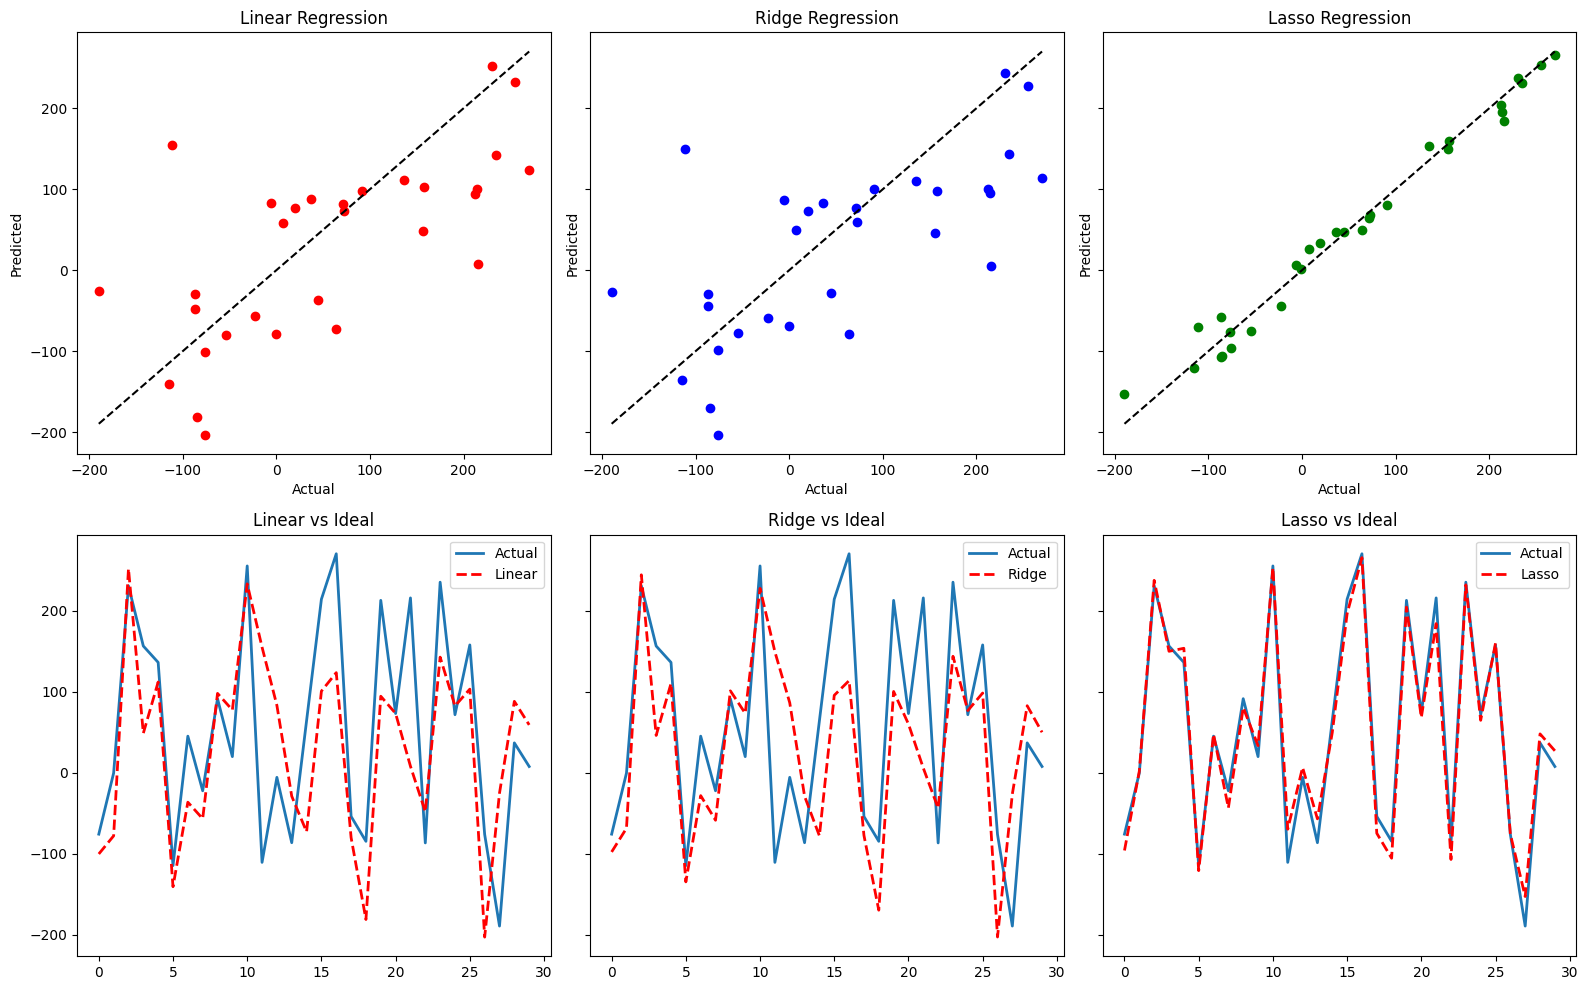

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10), sharey=True)

ax[0, 0].scatter(y_test, y_pred_lr, c='red', label='Linear')
ax[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[0, 0].set_title('Linear Regression')
ax[0, 0].set_xlabel('Actual')
ax[0, 0].set_ylabel('Predicted')

ax[0, 1].scatter(y_test, y_pred_ridge, c='blue', label='Ridge')
ax[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[0, 1].set_title('Ridge Regression')
ax[0, 1].set_xlabel('Actual')
ax[0, 1].set_ylabel('Predicted')

ax[0, 2].scatter(y_test, y_pred_lasso, c='green', label='Lasso')
ax[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[0, 2].set_title('Lasso Regression')
ax[0, 2].set_xlabel('Actual')
ax[0, 2].set_ylabel('Predicted')

# Actual vs Ideal Predictions
ax[1, 0].plot(y_test, label='Actual', lw=2)
ax[1, 0].plot(y_pred_lr, '--', lw=2, c='red', label='Linear')
ax[1, 0].set_title('Linear vs Ideal')
ax[1, 0].legend()

ax[1, 1].plot(y_test, label='Actual', lw=2)
ax[1, 1].plot(y_pred_ridge, '--', lw=2, c='red', label='Ridge')
ax[1, 1].set_title('Ridge vs Ideal')
ax[1, 1].legend()

ax[1, 2].plot(y_test, label='Actual', lw=2)
ax[1, 2].plot(y_pred_lasso, '--', lw=2, c='red', label='Lasso')
ax[1, 2].set_title('Lasso vs Ideal')
ax[1, 2].legend()

plt.tight_layout()
plt.show()

<h3>Model Coefficients</h3>

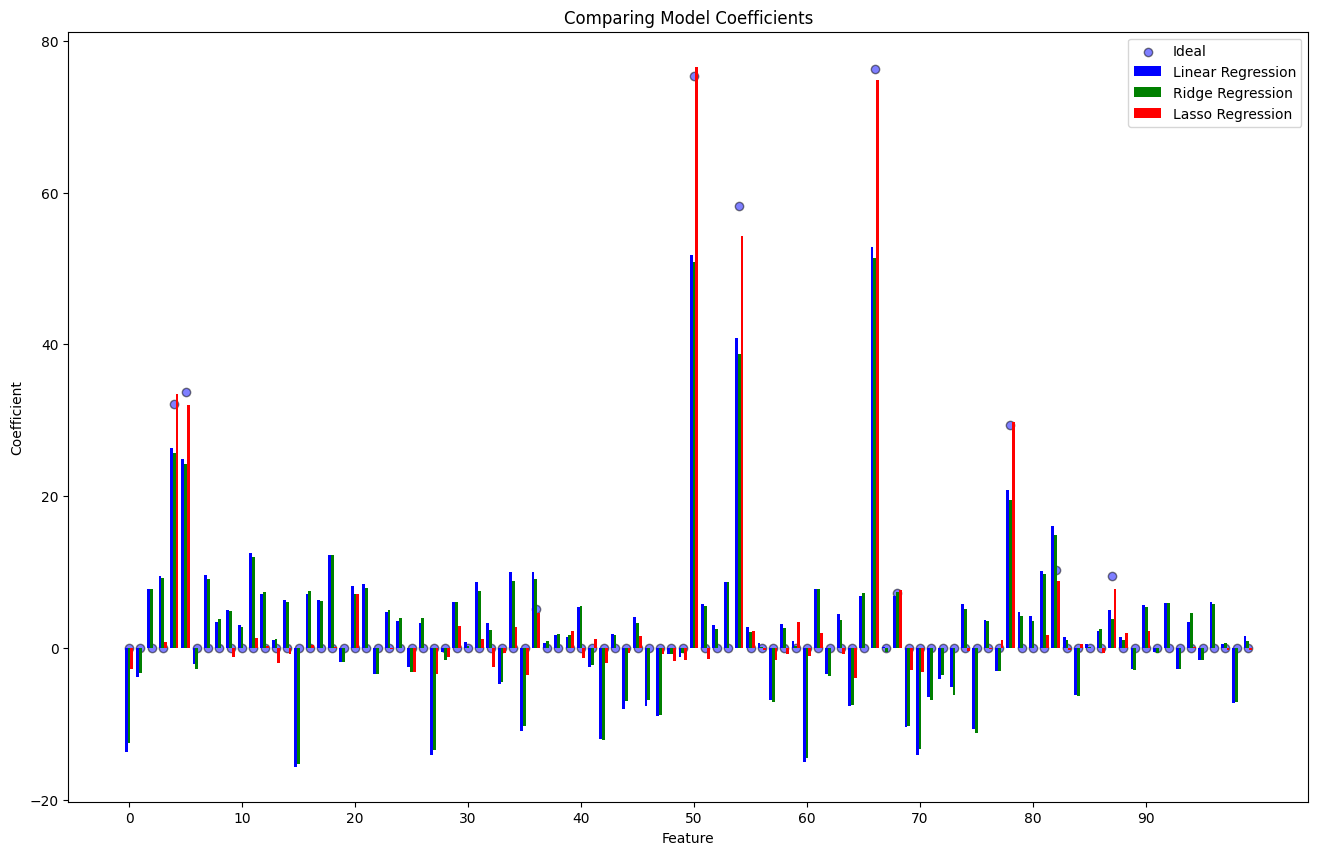

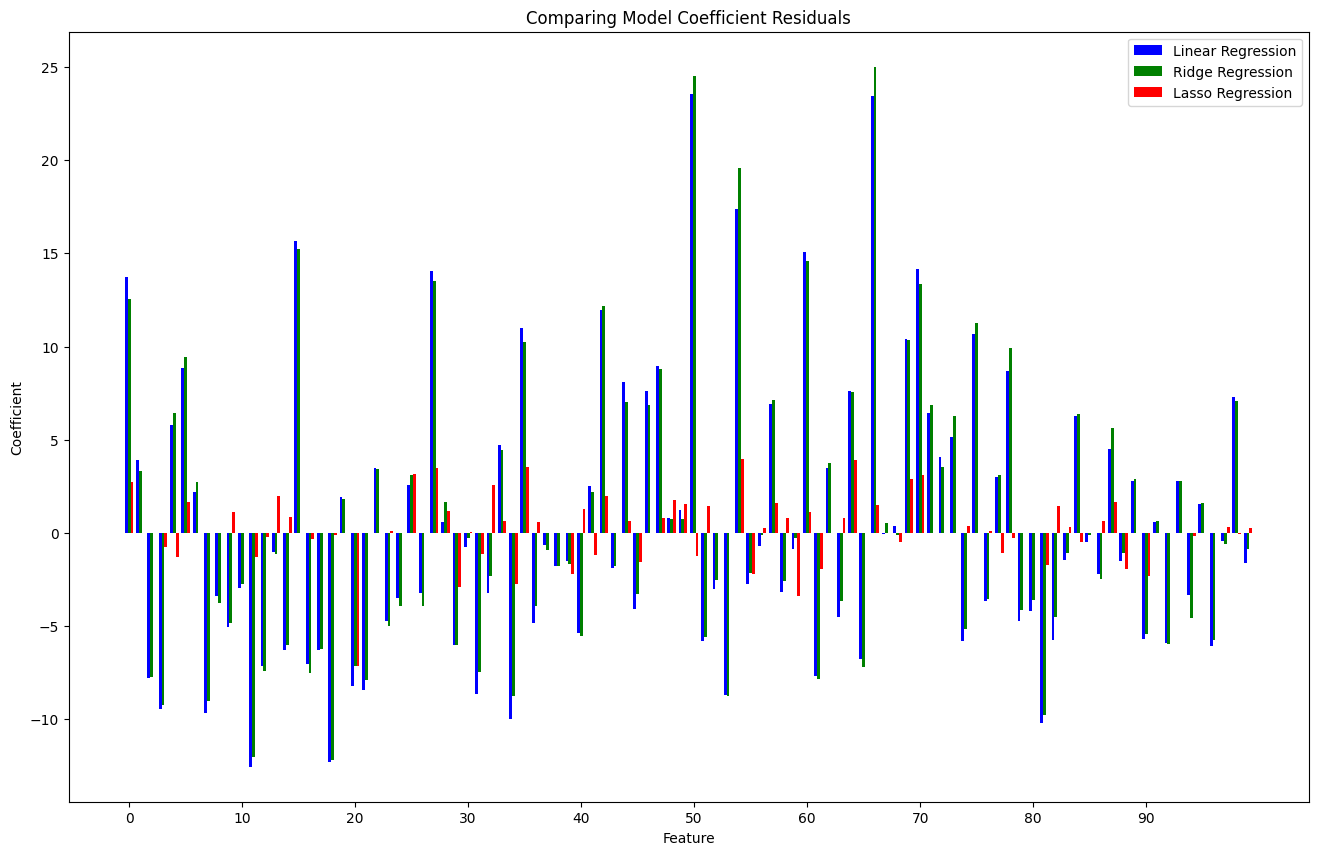

In [24]:
lr_coef = lr.coef_
ridge_coef = ridge.coef_
lass_coef = lasso.coef_

# Plot Coefficients
x_axis = np.arange(len(lr_coef))
x_labels = np.arange(min(x_axis), max(x_axis), 10)

plt.figure(figsize=(16, 10))

plt.scatter(x_axis, ideal_coef, label='Ideal', c='blue', ec='k', alpha=0.5)
plt.bar(x_axis - 0.25, lr_coef, width=0.25, color='blue', label='Linear Regression')
plt.bar(x_axis, ridge_coef, width=0.25, color='green', label='Ridge Regression')
plt.bar(x_axis + 0.25, lass_coef, width=0.25, color='red', label='Lasso Regression')

plt.title('Comparing Model Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(x_labels)
plt.legend()
plt.show()

# Plot Coefficient Residuals
x_axis = np.arange(len(lr_coef))

plt.figure(figsize=(16, 10))

plt.bar(x_axis - 0.25, ideal_coef - lr_coef, width=0.25, color='blue', label='Linear Regression')
plt.bar(x_axis, ideal_coef - ridge_coef, width=0.25, color='green', label='Ridge Regression')
plt.bar(x_axis + 0.25, ideal_coef - lass_coef, width=0.25, color='red', label='Lasso Regression')

plt.title('Comparing Model Coefficient Residuals')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(x_labels)
plt.legend()
plt.show()

In [26]:
threshold = 5

feature_imp_df = pd.DataFrame({
    'Lasso Coefficient': lass_coef,
    'Ideal Coefficient': ideal_coef
})

feature_imp_df['Feature Selected'] = feature_imp_df['Lasso Coefficient'].abs() > threshold

print('Important Features identified by Lasso')
display(feature_imp_df[feature_imp_df['Feature Selected']])

print('Non-zero Ideal Coefficient Indices')
display(feature_imp_df[feature_imp_df['Ideal Coefficient'] > 0])

Important Features identified by Lasso


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
20,7.163636,0.000000,True
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True


Non-zero Ideal Coefficient Indices


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
36,4.588118,5.166218,False
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True


In [28]:
imp_features = feature_imp_df[feature_imp_df['Feature Selected']].index

X_filter = X[:, imp_features]
print('Filtered feature set shape:', X_filter.shape)

X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X_filter, y, ideal_pred, test_size=0.3, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
reg_results(y_test, y_pred_lr, 'Ordinary')

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
reg_results(y_test, y_pred_ridge, 'Ridge')

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
reg_results(y_test, y_pred_lasso, 'Lasso')

Filtered feature set shape: (100, 10)

Evaluation Metrics for Ordinary Linear Regression
Explained Variance: 0.9917
MAE: 9.653
MSE: 139.4874
RMSE: 11.8105
R^2: 0.9915

Evaluation Metrics for Ridge Linear Regression
Explained Variance: 0.9909
MAE: 10.1418
MSE: 156.9035
RMSE: 12.5261
R^2: 0.9905

Evaluation Metrics for Lasso Linear Regression
Explained Variance: 0.9917
MAE: 9.6928
MSE: 140.803
RMSE: 11.866
R^2: 0.9914


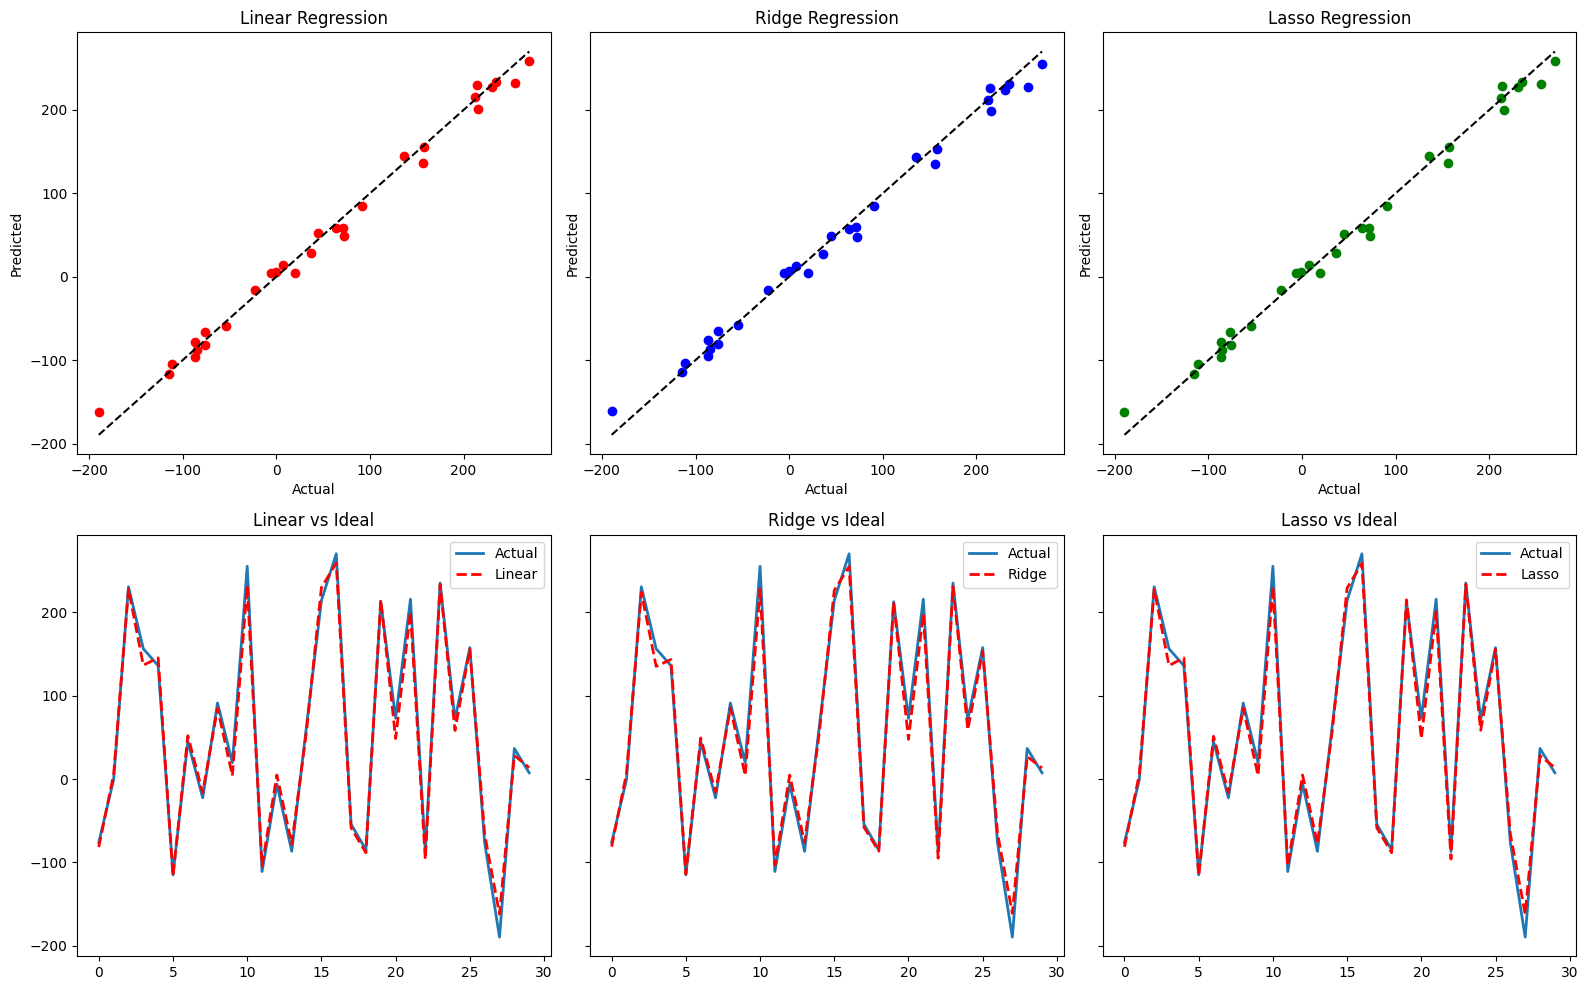

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10), sharey=True)

ax[0, 0].scatter(y_test, y_pred_lr, c='red', label='Linear')
ax[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[0, 0].set_title('Linear Regression')
ax[0, 0].set_xlabel('Actual')
ax[0, 0].set_ylabel('Predicted')

ax[0, 1].scatter(y_test, y_pred_ridge, c='blue', label='Ridge')
ax[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[0, 1].set_title('Ridge Regression')
ax[0, 1].set_xlabel('Actual')
ax[0, 1].set_ylabel('Predicted')

ax[0, 2].scatter(y_test, y_pred_lasso, c='green', label='Lasso')
ax[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[0, 2].set_title('Lasso Regression')
ax[0, 2].set_xlabel('Actual')
ax[0, 2].set_ylabel('Predicted')

# Actual vs Ideal Predictions
ax[1, 0].plot(y_test, label='Actual', lw=2)
ax[1, 0].plot(y_pred_lr, '--', lw=2, c='red', label='Linear')
ax[1, 0].set_title('Linear vs Ideal')
ax[1, 0].legend()

ax[1, 1].plot(y_test, label='Actual', lw=2)
ax[1, 1].plot(y_pred_ridge, '--', lw=2, c='red', label='Ridge')
ax[1, 1].set_title('Ridge vs Ideal')
ax[1, 1].legend()

ax[1, 2].plot(y_test, label='Actual', lw=2)
ax[1, 2].plot(y_pred_lasso, '--', lw=2, c='red', label='Lasso')
ax[1, 2].set_title('Lasso vs Ideal')
ax[1, 2].legend()

plt.tight_layout()
plt.show()